In [0]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# [25 pts] A Toy Example: Decision Boundary and Conditional Independence Assumption

### Gaussian Distributed Data fits better to Gaussian Naive Bayesian rather than Logistic Regression, unfortunately that is not the case most of the time.
Now, imagine we have two artificial dataset. Both are drawn from Gaussian distribution. One of the dataset is with standard deviation 1 and the other is 5. Each cluster is conditionally independent from each other.

make_blobs function samples data points from gaussian distribution.

In [0]:
from sklearn.datasets import make_blobs
data1, label1 = make_blobs(n_samples=1500 , cluster_std=1 , centers=2 , random_state=1, n_features=2) # code comes here
data2, label2 = make_blobs(n_samples=1500 , cluster_std=5 , centers=2, random_state=1, n_features=2)# code comes here

Let's split the datasets into train and test.

In [0]:
# code comes here
x_train, x_val, y_train, y_val = train_test_split(data1, label1, test_size=0.2)
# code comes here
x2_train, x2_val, y2_train, y2_val = train_test_split(data2, label2, test_size=0.2)

Plot the first dataset with standard deviation 1.

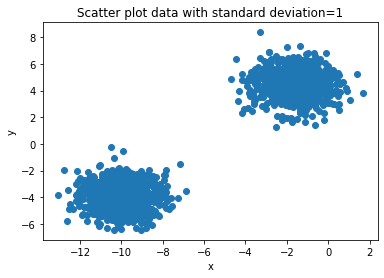

In [24]:
plt.scatter(data1[:,0], data1[:,1])
plt.title('Scatter plot data with standard deviation=1')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Plot the first dataset with standard deviation 4.

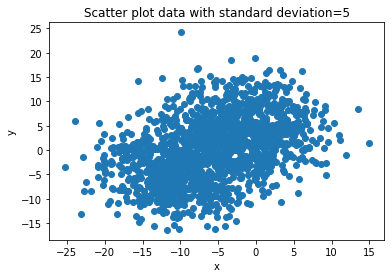

In [25]:
plt.scatter(data2[:,0], data2[:,1])
plt.title('Scatter plot data with standard deviation=5')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Train a Gaussian Naive Bayesian and Logistic Regression with the 1st dataset.

In [26]:
# code comes here
gnb = GaussianNB();
# code comes here
gnb.fit(x_train , y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [27]:
# code comes here
logreg = LogisticRegression()
# code comes here
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Perfect Decision Boundary

In [8]:
# Predict
pred = gnb.predict(x_val)
print("Classification Report for Naive Bayesian:")
print(classification_report(y_val, pred))

Classification Report for Naive Bayesian:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       154
           1       1.00      1.00      1.00       146

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [0]:
# Predict
pred2 = logreg.predict(x_val)
print("Classification Report for Logistic Regression:")
print(classification_report(y_val , pred2))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       144
           1       1.00      1.00      1.00       156

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



### Both algorithm perfectly separate two data clusters for 1st dataset with standard deviation 1. The data points are linearly separable.

In [28]:
# code comes here
gnb2 = GaussianNB();
# code comes here
gnb2.fit(x2_train , y2_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [29]:
# code comes here
logreg2 = LogisticRegression()
# code comes here
logreg2.fit(x2_train,y2_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
# Predict
pred3 = gnb2.predict(x2_val)
print("Classification Report for Naive Bayesian:")
print(classification_report(y2_val, pred3))

Classification Report for Naive Bayesian:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       167
           1       0.87      0.89      0.88       133

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



In [31]:
# Predict
pred4 = logreg.predict(x2_val)
print("Classification Report for Logistic Regression:")
print(classification_report(y2_val, pred4))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       167
           1       0.88      0.89      0.88       133

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [33]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

%matplotlib inline

# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


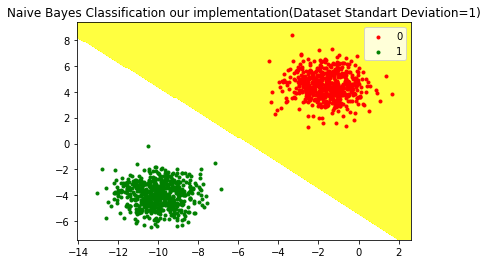

In [0]:
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.1),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.1))
plt.contourf(X1, X2, gnb.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('yellow', 'white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j,marker='.')
plt.title('Naive Bayes Classification our implementation(Dataset with Standart Deviation=1)')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


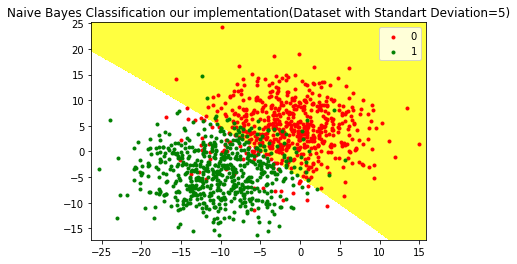

In [34]:
X_set, y_set = x2_train, y2_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.1),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.1))
plt.contourf(X1, X2, gnb2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('yellow', 'white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j,marker='.')
plt.title('Naive Bayes Classification our implementation(Dataset with Standart Deviation=5)')
plt.legend()
plt.show()

### Use the scatter plot and draw the perfect decision boundary on two scatter plot. Discuss what is linear separability, decision boundary, which datapoints are harder to separate. Discuss the accuries and the why which model performs better.
 

### Please also read: [Equivalence of GNB and LR](https://appliedmachinelearning.blog/2019/09/30/equivalence-of-gaussian-naive-bayes-and-logistic-regression-an-explanation/)

**Discussion**

Linear separability is where two data features can separeted by an linear line. Decision boundry is seperation of one region from other region or regions. First data with standart deviation one can more easily separated. Because GNB is more suitable for linear separable datas. But second data is harder to separate with GNB because it is not a linearly seperable. GNB assumes features are statistically independent. It models the actual distribution of each class. It is using joint probability distribution. But, logistic regression use conditional probability distribution. However, datasets we use are conditionally independent. So GNB can give us better results due to that fact. As we can see from classification reports GNB has better ‘recall’ for 1 and ‘f1-score’ for 0.     

# [75pts] Logistic Regression and Naive Bayesian Comparison

### The dataset
We will use Kaggle dataset. This dataset contains around 200k news headlines from the year 2012 to 2018 obtained from HuffPost.

You can [download.](https://www.kaggle.com/rmisra/news-category-dataset)

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df=pd.read_json('/content/drive/My Drive/News_Category_Dataset_v2.json' , lines=True)

## Select 4 categories: Politics, Wellness, Entertainment, Travel

use only 50K of data row

In [0]:
df = df.sample(50000)

In [0]:
new_df = df[(df['category']== 'POLITICS') | (df['category']== 'WELLNESS') | (df['category']== 'ENTERTAINMENT') | (df['category']== 'TRAVEL')]

In [42]:
new_df['category'].value_counts()

POLITICS         8150
WELLNESS         4449
ENTERTAINMENT    4014
TRAVEL           2452
Name: category, dtype: int64

Convert category names to digit labelling

In [0]:
y = (new_df['category'].to_numpy() == "WELLNESS")*1 + (new_df['category'].to_numpy() == "ENTERTAINMENT")*2 + (new_df['category'].to_numpy() == "TRAVEL")*3

Merge headlines with short descriptions

In [0]:
X = new_df['short_description'] + ' '+ new_df['headline']

### Create Tf-Idf model

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

# code comes here
count_vect = CountVectorizer(lowercase=True, stop_words='english')
# code comes here
X_train_counts = count_vect.fit_transform(X)

In [0]:
from sklearn.feature_extraction.text import TfidfTransformer

# code comes here
tfidf_transformer = TfidfTransformer()
# code comes here
X_train_tf = tfidf_transformer.fit_transform(X_train_counts)

Split train and test data

In [0]:
from sklearn.model_selection import train_test_split
# code comes here
x_train, x_val, y_train, y_val = train_test_split(X_train_tf, y, test_size=0.2 )

### Gaussian Naive Bayesian

In [48]:
# code comes here
GNB = GaussianNB()
# code comes here
GNB.fit(x_train.toarray(), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [50]:
# Predict
print("Classification Report for Naive Bayesian:")
print(classification_report(GNB.predict(x_val.toarray()), y_val))

Classification Report for Naive Bayesian:
              precision    recall  f1-score   support

           0       0.75      0.79      0.77      1585
           1       0.68      0.70      0.69       851
           2       0.65      0.62      0.63       810
           3       0.66      0.56      0.61       567

    accuracy                           0.70      3813
   macro avg       0.68      0.67      0.68      3813
weighted avg       0.70      0.70      0.70      3813



In [0]:
labels = np.unique(y)
resultsGNB = confusion_matrix(y_val,GNB.predict(x_val.toarray()) ,labels=labels ) 
pd.DataFrame(resultsGNB, index=labels, columns=labels)

,0,1,2,3
0,1259,131,216,69
1,137,584,57,76
2,136,53,563,61
3,99,57,33,289


### 6) Logistic Regression

In [0]:
#code comes here
LOGREG = LogisticRegression(max_iter=100000000)
# code comes here
LOGREG.fit(x_train.toarray(),y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Predict
print("Classification Report for Logistic Regression:")
print(classification_report(LOGREG.predict(x_val.toarray()) , y_val))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      1726
           1       0.91      0.90      0.90       917
           2       0.85      0.90      0.87       752
           3       0.78      0.92      0.85       432

    accuracy                           0.90      3827
   macro avg       0.88      0.90      0.89      3827
weighted avg       0.91      0.90      0.90      3827



In [0]:
labels = np.unique(y)
resultsLGR = confusion_matrix(y_val,LOGREG.predict(x_val.toarray()) , labels=labels ) 
#print ("Confusion Matrix :")
#print(resultsLGR) 
pd.DataFrame(resultsLGR, index=labels, columns=labels)

,0,1,2,3
0,1604,26,34,6
1,42,759,31,11
2,79,22,675,8
3,31,48,42,402


### Observe Logistic Regression is much slower but more accurate. Discuss.

**Report**

 We compare two machine learning models with each other. They are Logistic Regression and Gaussian Naive Bayes. We used an news paper data set with size 50K. We have 4 topics for the news and we try to estimate them. We have obtianed the best results with using Logistic Regression, giving a accuracy of %90 on test data. GNB has given more poor results if compared. It is giving a accuracy of %70. We have better result with Logistic Regression because our data has many correlated features. And logistic regression works better when there is more correlated features because it is using conditional probability distribution. 
 In terms of speed GNB is faster than Logistic Regression. 
In logistic regression we have very high accuracy. We can see observe it from conditional matrix as well. For example, logistic regression estimate 1604 Politic articles true otherwise GNB's score is 1259.   

